In [4]:
from pipe_network import PipeNetwork

INPUT_FILE = 'input_test.txt'

with open(INPUT_FILE) as f:
    lines = (line.strip() for line in f)
    pipe_network = PipeNetwork(lines)

graph = pipe_network.get_networkx_graph()

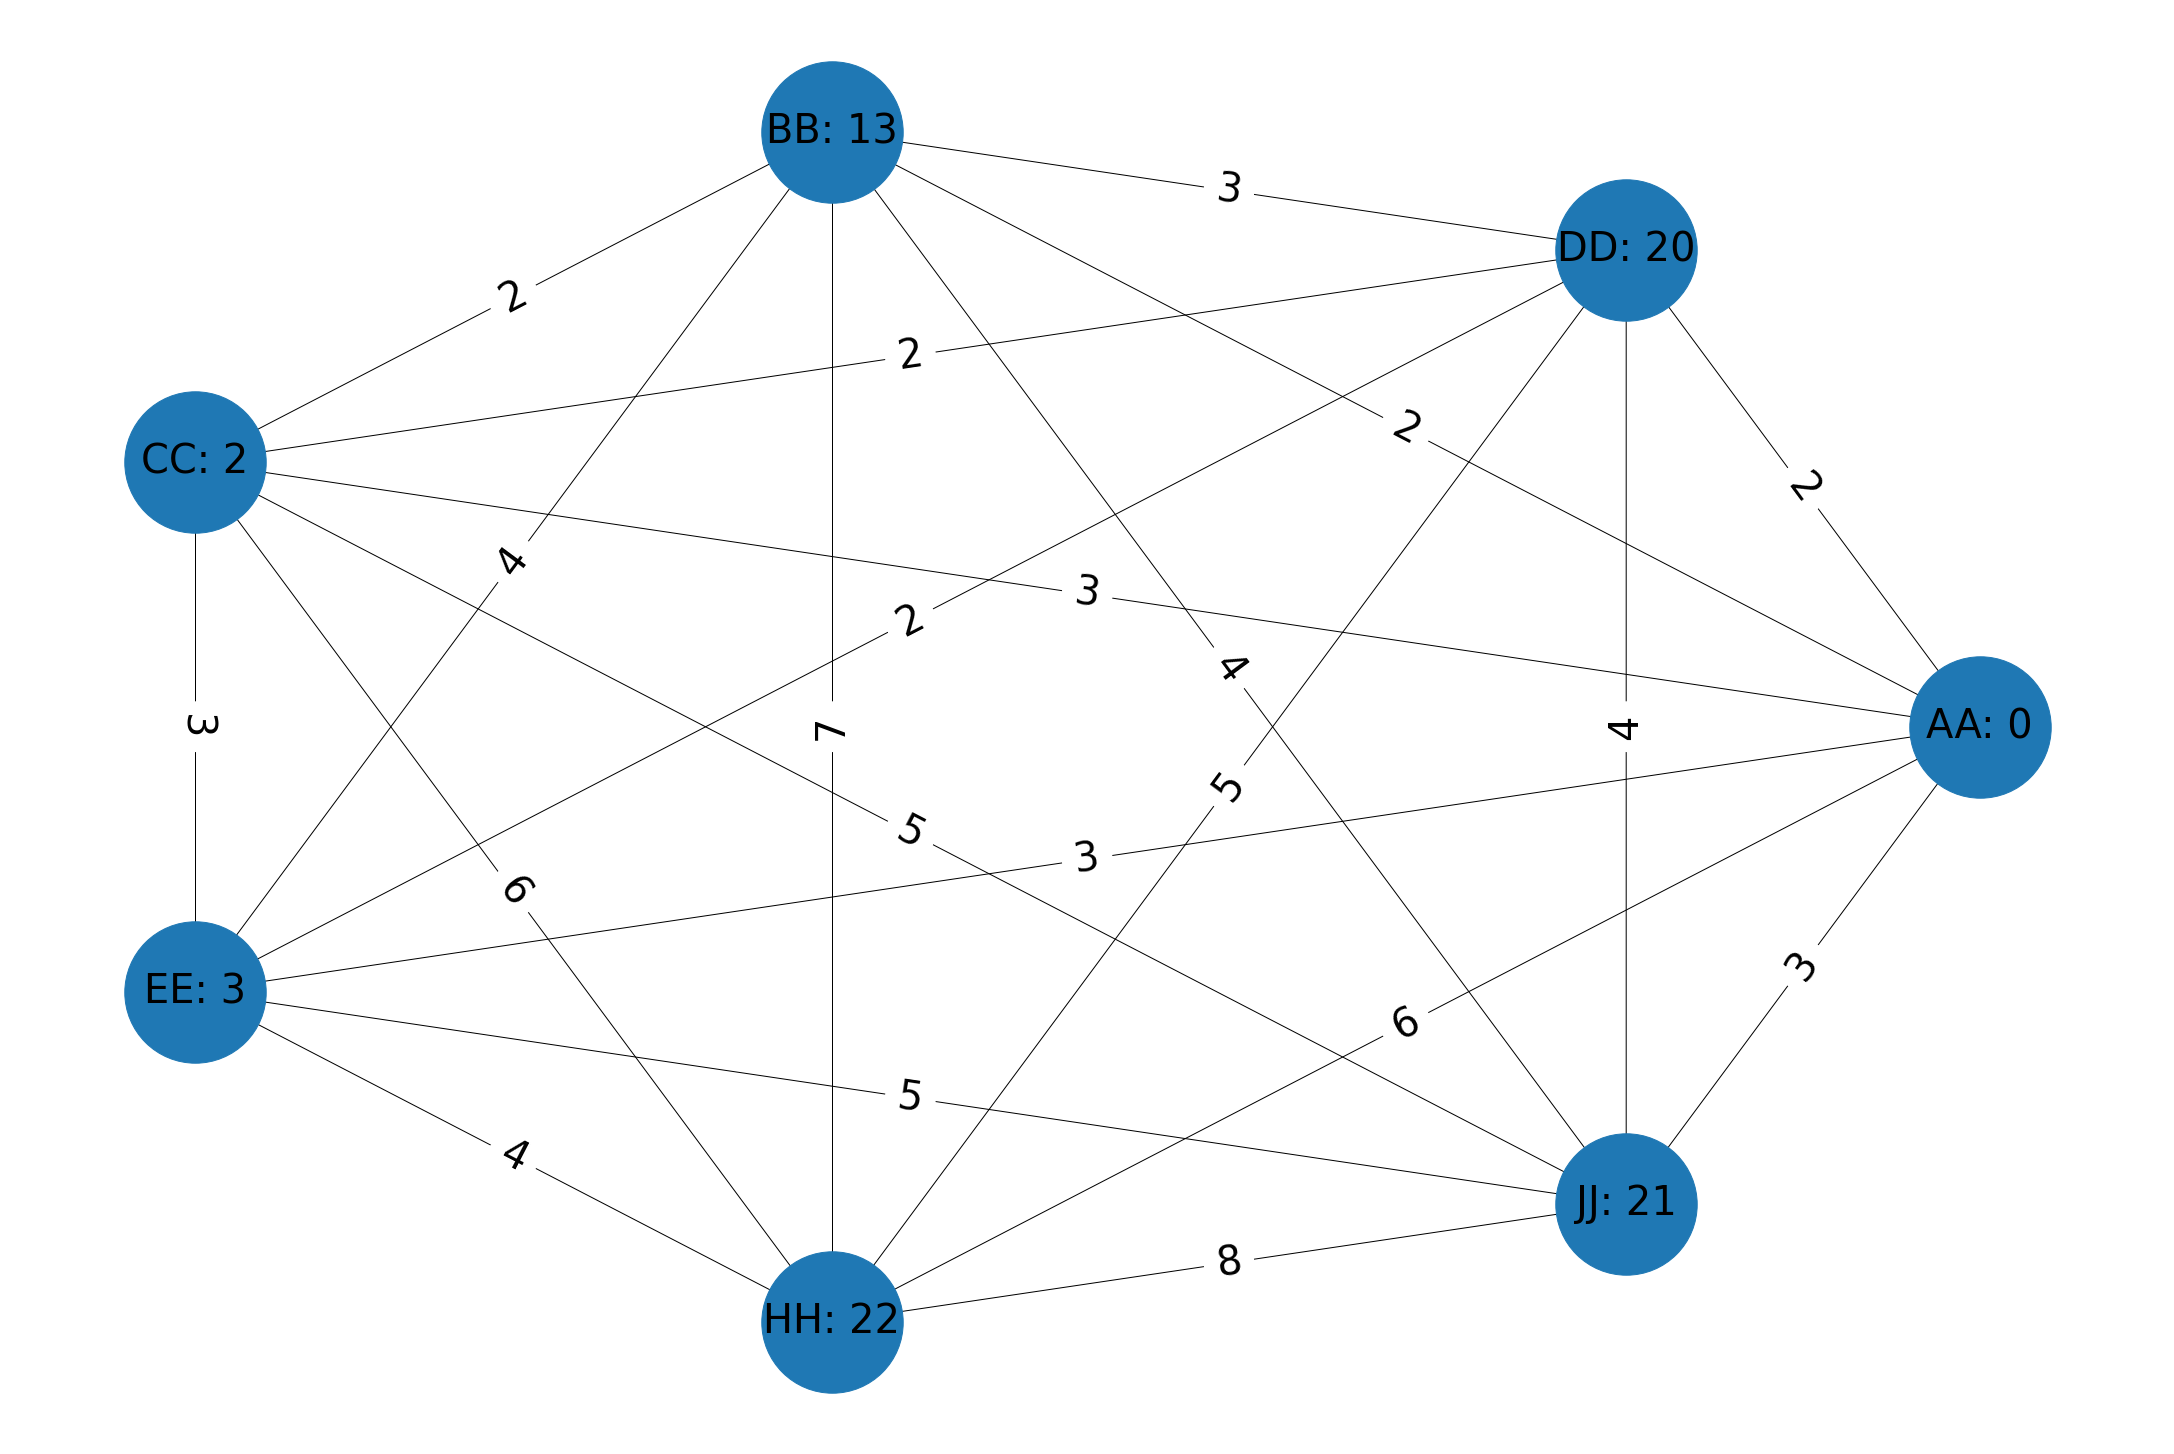

In [17]:
import matplotlib.pyplot as plt
import copy

FW_trimmed = nx.Graph()

def ok_node(node: str) -> bool:
    if node == 'AA' or pipe_network._nodes[node].flow_rate > 0:
        return True
    return False

for src in FW:
    for dst in FW[src]:
        if ok_node(src) and ok_node(dst) and src != dst:
            FW_trimmed.add_edge(src, dst, weight=FW[src][dst])
edge_labels = {(src, dst): int(FW[src][dst]) + 1 for dst in FW[src] if dst in FW_trimmed for src in FW if src in FW_trimmed}

pos=nx.get_node_attributes(FW_trimmed,'pos')
labels = nx.get_edge_attributes(FW_trimmed,'weight')

plt.figure(figsize=[30, 20])
pos = nx.circular_layout(FW_trimmed)
nx.draw(
    FW_trimmed, pos, with_labels=True, font_size=40, node_size=20000,
    labels={node: f'{node}: {pipe_network._nodes[node].flow_rate}' for node in FW_trimmed}
)
nx.draw_networkx_edge_labels(FW_trimmed, pos, edge_labels=edge_labels, font_size=40)
plt.show()

In [5]:
import networkx as nx

FW = nx.floyd_warshall(graph)

def calculate_cost(dst, travel_time):
    return sum((travel_time + 1) * node.flow_rate for node in pipe_network._nodes.values() if not node.is_valve_open())

def calculate_total_cost(src, dst, time_left):
    travel_time = FW[src][dst]
    gain = (time_left - travel_time - 1) * pipe_network._nodes[dst].flow_rate
    cost = calculate_cost(dst, travel_time)
    total_cost = cost - gain
#     return f'{total_cost:8}{cost:8}{gain:8}'
    return total_cost

for name, dst in pipe_network._nodes.items():
    print(name, calculate_total_cost('AA', name, 30))
print()
pipe_network._nodes['DD'].open_valve()
for name, dst in pipe_network._nodes.items():
    print(name, calculate_total_cost('DD', name, 28))

AA 81
BB -202.0
CC 189.0
DD -398.0
EE 162.0
FF 324.0
GG 405.0
HH -42.0
II 162.0
JJ -324.0

AA 122.0
BB -142.0
CC 70.0
DD -479
EE 44.0
FF 183.0
GG 244.0
HH -201.0
II 183.0
JJ -260.0


In [3]:
time_left = 30
current_node = 'AA'
pressure_released = 0

while time_left > 0:
    costs = {}
    for name, dst in pipe_network._nodes.items():
        if current_node == name or dst.is_valve_open():
            continue
        costs[name] = calculate_total_cost(current_node, name, time_left)
    best_node = min(costs.items(), key=lambda x: x[1])[0]
    if pipe_network._nodes['DD'].is_valve_open() and not pipe_network._nodes['BB'].is_valve_open():
        best_node = 'BB'
    time_left -= FW[current_node][best_node] + 1
    print(best_node, time_left, pipe_network._nodes[best_node].flow_rate)
#     if time_left > 0:
    pressure_released += time_left * pipe_network._nodes[best_node].flow_rate
    pipe_network._nodes[best_node].open_valve()
    current_node = best_node
print(pressure_released)

DD 28.0 20
BB 25.0 13
JJ 21.0 21
HH 13.0 22
EE 9.0 3
CC 6.0 2
AA 3.0 0
FF -1.0 0
1651.0


In [11]:
print(time_left)


-1.0


In [30]:
for name, dst in pipe_network._nodes.items():
    cache = dst._open
    dst._open = True
    print(name, calculate_total_cost('DD', name, 30))
    dst._open = cache

AA    162.0   162.0     0.0
BB   -147.0   204.0   351.0
CC    102.0   158.0    56.0
DD     -519      61     580
EE     72.0   156.0    84.0
FF    243.0   243.0     0.0
GG    324.0   324.0     0.0
HH   -255.0   295.0   550.0
II    243.0   243.0     0.0
JJ   -306.0   240.0   546.0


In [12]:
FW = nx.floyd_warshall(graph)